## 実験結果

実験用の Web ページで表示された結果を CSV に記述し、 `data.csv` として保存した。`data.csv` を Python のデータ分析用ライブラリである pandas で読み込み、表として示す。

In [1]:
import pandas as pd

data = pd.read_csv("data.csv")

data

,index,time(ms),size,distance,d/s,log(d/s+1)
0,1,785,317.6,521.12,1.6,1.40
1,2,681,238.2,224.02,0.9,0.96
2,3,786,158.8,419.91,2.6,1.87
3,4,738,238.2,27.64,0.1,0.16
4,5,939,158.8,675.64,4.3,2.39
5,6,1271,238.2,711.44,3.0,2.00
6,7,926,79.4,290.64,3.7,2.22
7,8,927,79.4,366.90,4.6,2.49
8,9,861,238.2,624.80,2.6,1.86
9,10,892,158.8,353.34,2.2,1.69


次に、Python の可視化ライブラリである Matplotlib を用いて横軸を $\log_2 \left(1+ \dfrac{d}{s} \right)$、縦軸を時間としたグラフ（散布図）を描く。

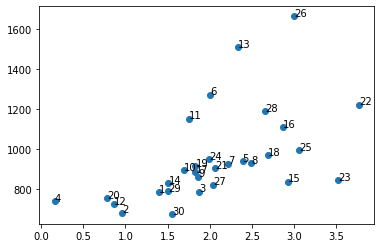

In [2]:
import matplotlib.pyplot as plt

x = data[["log(d/s+1)"]]
y = data["time(ms)"]

plt.scatter(x, y)

for i, label in enumerate(data["index"]):
  plt.annotate(f"{label}", (x["log(d/s+1)"][i], y[i]))

plt.show()

## 考察

フィッツの法則: $ T = a + b \log_2 \left( 1 + \dfrac{D}{W}\right) $ における $a$、$b$ を、Python の機械学習ライブラリである scikit-learn 最小二乗法線型回帰モデルのクラスである `LinearRegression` を用いて求める。

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

print(f"a = {model.intercept_}")
print(f"b = {model.coef_[0]}")

a = 630.791845539946
b = 155.78507037677207


また、この $a$ と $b$ をもとに、$\left( 1 + \dfrac{D}{W}\right)$ と $T$ とのグラフを散布図上に表示する。

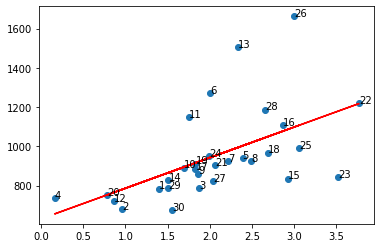

In [4]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), color="red")

for i, label in enumerate(data["index"]):
  plt.annotate(f"{label}", (x["log(d/s+1)"][i], y[i]))

plt.show()

また、このモデルの決定係数 $R^2$ を表示する。

In [5]:
model.score(x, y)

0.2973401413675719